# Ch.3 Splitting datasets one feature at a time: decision trees

## 의사결정 트리 (Decision Trees)

* 의사결정 트리는 마치 스무고개 게임처럼 동작한다.


* Decision Tree Flowchart (그림 3.1 p.49)
  - Decision Block (의사결정 블록, 사각형)
  - Terminal Block (단말 블록, 타원형)
  - Branch (가지)
  

* 장점
  - 적은 계산 비용
  - 이해하기 쉬운 학습 결과
  - 누락된 값 있어도 처리 가능
  - 분류와 무관한 특징도 처리 가능


* 단점
  - 과적합(overfitting)되기 쉬움: 너무 복잡한 의사결정 트리


* 적용
  - 수치형 값, 명목형 값

## 3.1 Tree construction

### ID3 알고리즘
1. 데이터를 가장 잘 나눌 수 있는 특징을 먼저 찾아서 데이터 집합을 하위 집합으로 분할
  - 정보 이득(Information Gain)이 가장 큰 특징
  - 엔트로피(Entopy)가 가장 크게 낮아지는 특징
2. 해당 특징을 포함하는 노드 생성
3. 하위 집합의 모든 데이터가 같은 클래스에 속하면 해당 하위 집합에 대한 분류 종료
4. 2의 경우가 아니라면 이 하위 집합에 대해 1을 적용
5. 모든 데이터가 분류될 때까지(= 모든 하위 집합에 대해) 1~4 반복
  - 재귀적 방법으로 해결
  

* https://en.wikipedia.org/wiki/ID3_algorithm

### $ 트리 구조 생성 의사코드 p.51

### General approach to Dicision Tree
1. Collect:
  - 모든 방법
2. Prepare:
  - 명목형 값
  - 연속형 값(수치형)은 양자화를 통해 이산형 값으로 변환
3. Analyze:
  - 모든 방법
  - 트리를 구성한 후 시각적으로 검토
4. Train:
  - 트리 데이터 구조를 구성
5. Test: 
  - 학습된 트리로 오류율(error rate) 계산
6. Use:
  - 모든 지도학습에 사용 가능
  - 대개 데이터를 더 잘 이해하기 위해 사용


* 양자화(Quantization)
  - https://ko.wikipedia.org/wiki/%EC%96%91%EC%9E%90%ED%99%94_(%EC%A0%95%EB%B3%B4_%EC%9D%B4%EB%A1%A0)
  - http://www.ktword.co.kr/abbr_view.php?m_temp1=911

### 의사결정 트리 알고리즘

  - https://ko.wikipedia.org/wiki/%EA%B2%B0%EC%A0%95_%ED%8A%B8%EB%A6%AC_%ED%95%99%EC%8A%B5%EB%B2%95
  * ID3 (Iterative Dichotomiser 3)
  * C4.5 (successor of ID3)
  * C5.0 (successor of ID4)
  * CART (Classification And Regression Tree)
  * CHAID (CHi-squared Automatic Interaction Detector)
  * MARS (Multivariate adaptive regression splines)
  * 조건부 추론 트리 (Conditional Inference Trees) 

### 가정 적합한 분할 기준을 선택하는 방법
  * 정보 이득
  * 지니 불순도(Gini Impurity)
  * 분산 감소

## 표 3.1 해양 동물 데이터 p.52
  * '물고기이다'와 '물고기가 아니다'로 분류

## 3.1.1 Information gain
  * 데이터를 분할하기 이전과 이후의 정보량(엔트로피) 변화
  * 정보 이득이 가장 큰 특징에 대해 분할 수행
  * 정보 이득으로 정보의 불확실성(엔트로피) 감소

### 개별 정보량과 엔트로피 (p.53~54)

  * 개별 정보량
    * 확률이 낮을수록 개별 정보량은 커진다 == 엔트로피가 커지는데 기여
      - 로그의 결과에 -1을 곱한 이유
    * 밑이 2
      - 정보를 전달(표현)하는데 몇 자리 2진수(몇 비트)면 충분한가


  * 엔트로피
    * 정보에 대한 기댓값
    * 불확실한 정도, 무질서 정도
    * 확률이 낮은 사건이 많을수록 정보의 엔트로피(불확실성)이 커진다
    * 정보의 불확실성(엔트로피)가 높다
      - 어떤 값(정보)가 나올 지 알기 힘들다
    * 엔트로피가 높은 원인
      - 모든 사건의 확률이 균등하다
      - 확률이 낮은 사건이 많다
        - 정보가 다양하다
    


* http://leosworld.tistory.com/8
* https://ko.wikipedia.org/wiki/%EC%A0%95%EB%B3%B4_%EC%97%94%ED%8A%B8%EB%A1%9C%ED%94%BC

##### Listing 3.1 Function to calculate the Shannon entropy of a dataset

In [18]:
import trees

In [19]:
myDat, labels = trees.createDataSet()

In [20]:
myDat

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

In [21]:
labels

['no surfacing', 'flippers']

In [22]:
trees.calcShannonEnt(myDat)      

0.9709505944546686

In [23]:
myDat[0][-1] = 'maybe'    # 레이블 하나 더 넣어주었더니, 혼잡해지고 불확실해짐.
myDat

[[1, 1, 'maybe'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

In [24]:
trees.calcShannonEnt(myDat)      # yes no + maybe

1.3709505944546687

## 3.1.2 Splitting the dataset      이제 분리를 해야함. - 정보 이득이 크도록!!

##### Listing 3.2 Dataset splitting on a given feature
  - dataSet: 분할하고자 하는 데이터 집합
  - axis: 특징의 인덱스
  - value: 특징의 값

In [ ]:
# 1)
reducedFeatVec = featVec[:axis]     #chop out axis used for splitting
reducedFeatVec.extend(featVec[axis+1:])

# 2)
reducedFeatVec = list(featVec)
del reducedFeatVec[axis]

# 3)
reducedFeatVec = featVec[:axis] + featVec[axis+1:]

##### Listing 3.3 Choosing the best feature to split on
  - Listing 3.1과 Listing 3.2의 함수 호출
  
* 가정
  1. 데이터가 다중(중첩) 리스트
  2. 데이터의 마지막 컬럼, 마지막 아이템이 클래스 라벨

### 분할하기전 엔트로피
  * 0.9709505944546686

### 0번 특징으로 분할
  * 0번 특징이 0인 그룹 ==> 'no' 2개 ==> 정보가 없다
    - 엔트로피: 0
  * 0번 특징이 1인 그룹 ==> 'yes' 2개, 'no' 1개 ==> 확률이 2/3, 1/3
    - 엔트로피: 0.9182958340544896
  * 0번 특징으로 분할된 두 그룹에 대한 엔트로피의 기댓값
    - 2/5 \* 0.0 + 3/5 * 0.9182958340544896 = 0.5509775004326937
  
### 1번 특징으로 분할
  * 1번 특징이 0인 그룹 ==> 'no' 1개 ==> 정보가 없다
    - 엔트로피: 0
  * 1번 특징이 1인 그룹 ==> 'yes' 2개, 'no' 2개 ==> 확률이 1/2, 1/2
    - 엔트로피: 1.0
  * 1번 특징으로 분할된 두 그룹에 대한 엔트로피의 기댓값
    - 1/5 \* 0.0 + 4/5 * 1.0 = 0.8
    

### ==> 0번 특징으로 분할 시 정보 이득이 더 크다
### ==> 0번 특징이 최선의 분할 특징으로 선택된 것이 일리있음

## 3.1.3 Recursively building the tree

  1. 최선의 분할 특징으로 데이터 집합을 분할
  2. 이진 트리가 아니므로 2개 이상으로도 분할 가능
  3. 브랜치를 따라 하위 노드로 이동
  4. 1~3의 과정을 반복 ==> 재귀적 호출
  
  
  * 재귀적 호출에 대한 재귀 중단 조건
    - 브랜치의 모든 사례가 같은 레이블일 경우
    - 분할할 특징이 더 이상 남아있지 않은 경우
      + 레이블 중에서 다수결에 의해 결정
      + 다수결 코드 (p.61)
        
        
  * 재귀가 중단된 지점의 노드
    - 리프(leaf) 노드, 말단 블록(terminating block)

### # 의사결정 트리를 생성하는 것이 학습하는 것
##### Listing  3.4 Tree-building code

In [28]:
myDat, labels = trees.createDataSet()

In [29]:
myTree = trees.createTree(myDat,labels)

In [30]:
myTree        #  노서피싱() - 아니면  no 리턴 : 끝 /  1이면 또 한번 더 판별 { } 지느러미가 있느냐? 0 no

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

## 3.2 Plotting trees in Python with Matplotlib annotations

## 3.2.1 Matplotlib annotations
* Parts of a Figure in matplotlib
  - http://matplotlib.org/faq/usage_faq.html#parts-of-a-figure
  - https://i.stack.imgur.com/HZWkV.png


* matplotlib Annotation
  - https://matplotlib.org/users/annotations.html
    
  - annotate() method
    
  - 두 개의 점 고려, 각 점은 튜플(x, y)로 표현됨
    - xy: 애노테이션이 적용될 위치
    - xytext: 출력할 문자 위치
        
  - 좌표계
    + figure 계열: points, pixel, fraction
    + axes 계열: points, pixel, fraction
    + data: axes data coordinate system (기본값)

##### Listing 3.5 Plotting tree nodes with text annotations

In [34]:
import treePlotter       # 별도의 py 파일이 있음.
myTree # 첫번쨰 사전 / 두번째 사전 / 세번째 사전 

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

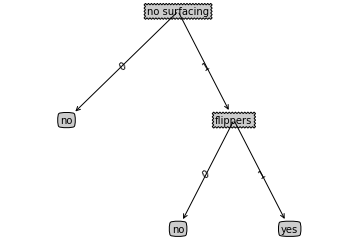

In [33]:
treePlotter.createPlot(myTree)

## 3.2.2 Constructing a tree of annotations 
* 리프 노드의 개수 - 각 요소의 적절한 X축 방향 크기 계산에 필요
* 트리의 깊이 - 각 요소의 적절한 Y축 방향 크기 계산에 필요

##### Listing 3.6 Identifying the number of leaves in a tree and the depth

##### Listing 3.7 The plotTree function

## 3.3 Testing and storing the classifier

## 3.3.1 Test: using the tree for classification
* 학습이 끝난 의사결정 트리를 분류 문제에 적용

* 리프 노드를 만날 때까지 의사결정 트리를 순회

##### Listing 3.8 Classification function for an existing decision tree

In [39]:
d = {'a' : 1, 'c' : 2, 'b' : 10 }

d.keys()

['a', 'c', 'b']

In [62]:
myTree.keys()

['no surfacing']

In [63]:
myTree['no surfacing']      # 이 키에 해당하는 값이 나옴.

{0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}

In [64]:
['a', 'b', 'f', 'hello', 'good'].index('hello')     => 위치 값이 나옴.

SyntaxError: invalid syntax (<ipython-input-64-63103d585db6>, line 1)

In [57]:
myDat, labels = trees.createDataSet()

In [68]:
labels

['flippers']

In [59]:
myTree = trees.createTree(myDat, labels)

In [60]:
myTree

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

In [66]:
myTree.keys()[0]

'no surfacing'

In [72]:
_,labels = trees.createDataSet()       # 피처를 건드리면서 트리가 완성 된 것은 제거가 되므로, 아래 값을 보기 위해선 한번 다시 선언해 주어야함.

In [73]:
trees.classify(myTree, labels, [1,0])

'no'

In [74]:
trees.classify(myTree, labels, [1,1])

'yes'

## 3.3.2 Use: persisting the decision tree
* 분류 한 문제마다 의사결정 트리를 작성하는 것은 시간 낭비
* 훈련된 의사결정 트리를 저장해두었다가 필요할 때 불러내어 사용

### # pickle 모듈
- https://docs.python.org/3/library/pickle.html

* 파이썬 객체 구조를 직렬화/역직렬화하기 위한 바이너리 프로토콜 구현
                   이진데이터   / 

* pickling: 파이썬 객체 ==> 바이트 스트림 (씨리얼라이즈 한다)
  - serialization, marshalling, flattening
* unpickling: 바이트 스트림 ==> 파이썬 객체


* pickle.dump()
* pickle.load()

In [75]:
trees.storeTree(myTree, 'MyDecisionTree')    # 파일 생성됨.

## 3.4 Example: using decision trees to predict contact lens type 

1. Collect:
  - 제공되는 텍스트 파일
2. Prepare:
  - TSV 파일을 파싱
3. Analyze:
  - 파싱된 데이터를 빠르게 눈으로 살펴본다.
  - 트리를 그려서 확인한다: createPlot()
4. Train:
  - 트리 데이터 구조를 구성: createTree()
5. Test: 
  - 주어진 사례를 트리에 적용하기 위한 함수 작성
6. Use:
  - 트리 데이터 구조가 저장소(파일, 데이터베이스 등)에 저장
  - 필요시 트리 구조를 불러다 모든 애플리케이션에 사용 가능  

### # 렌즈 데이터 집합
  * lenses.txt 데이터 파일
  
  
  * age
  * prescript
  * astigmatic (난시)
  * tear rate

In [82]:
fr = open('lenses.txt')

In [83]:
lenses = [inst.strip().split('\t') for inst in fr.readlines()]
lenses

[['young', 'myope', 'no', 'reduced', 'no lenses'],
 ['young', 'myope', 'no', 'normal', 'soft'],
 ['young', 'myope', 'yes', 'reduced', 'no lenses'],
 ['young', 'myope', 'yes', 'normal', 'hard'],
 ['young', 'hyper', 'no', 'reduced', 'no lenses'],
 ['young', 'hyper', 'no', 'normal', 'soft'],
 ['young', 'hyper', 'yes', 'reduced', 'no lenses'],
 ['young', 'hyper', 'yes', 'normal', 'hard'],
 ['pre', 'myope', 'no', 'reduced', 'no lenses'],
 ['pre', 'myope', 'no', 'normal', 'soft'],
 ['pre', 'myope', 'yes', 'reduced', 'no lenses'],
 ['pre', 'myope', 'yes', 'normal', 'hard'],
 ['pre', 'hyper', 'no', 'reduced', 'no lenses'],
 ['pre', 'hyper', 'no', 'normal', 'soft'],
 ['pre', 'hyper', 'yes', 'reduced', 'no lenses'],
 ['pre', 'hyper', 'yes', 'normal', 'no lenses'],
 ['presbyopic', 'myope', 'no', 'reduced', 'no lenses'],
 ['presbyopic', 'myope', 'no', 'normal', 'no lenses'],
 ['presbyopic', 'myope', 'yes', 'reduced', 'no lenses'],
 ['presbyopic', 'myope', 'yes', 'normal', 'hard'],
 ['presbyopic', 

In [ ]:
lensesLabels = ['age', ]

## 과적합(overfitting) 문제

## 3.5 Summary